# Housing Crash Simulator - EDA

Dataset sourced from Kaggle: https://www.kaggle.com/datasets/jyotsnagurjar/factors-influencing-us-house-prices 

In [11]:
from src.data_prep import load_data
df = load_data(save_processed=False)
df.head()

No missing values found.


,building_permits,construction_price_index,delinquency_rate,GDP,housing_inventory,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,households,construction_spending_change,unemployment_rate,urban_population,home_price_index
DATE,,,,,,,,,,,,,,,
2003-01-01,1808,144.4,1.97,14614.141,76,25.93,10710.4,1.24,5.9160,1654,111278.0,1.5,5.8,79.583,128.461
2003-02-01,1854,145.2,1.97,14614.141,82,25.93,10674.0,1.26,5.8425,1688,111278.0,-0.1,5.9,79.583,129.355
2003-03-01,1757,145.2,1.97,14614.141,98,25.93,10696.5,1.25,5.7450,1638,111278.0,-1.1,5.9,79.583,130.148
2003-04-01,1803,145.9,1.83,14743.567,91,25.93,10752.7,1.26,5.8125,1662,111278.0,1.7,6.0,79.583,130.884
2003-05-01,1835,145.8,1.83,14743.567,101,25.93,10832.0,1.26,5.4840,1733,111278.0,0.2,6.1,79.583,131.735


## Import Libraries

In [93]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [94]:
# Loading dataset
df = pd.read_csv("../data/raw/US_House_Price.csv", parse_dates=["DATE"])
df.set_index("DATE", inplace=True)
df.head()

,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population,home_price_index
DATE,,,,,,,,,,,,,,,
2003-01-01,1808,144.4,1.97,14614.141,76,25.93,10710.4,1.24,5.9160,1654,111278.0,1.5,5.8,79.583,128.461
2003-02-01,1854,145.2,1.97,14614.141,82,25.93,10674.0,1.26,5.8425,1688,111278.0,-0.1,5.9,79.583,129.355
2003-03-01,1757,145.2,1.97,14614.141,98,25.93,10696.5,1.25,5.7450,1638,111278.0,-1.1,5.9,79.583,130.148
2003-04-01,1803,145.9,1.83,14743.567,91,25.93,10752.7,1.26,5.8125,1662,111278.0,1.7,6.0,79.583,130.884
2003-05-01,1835,145.8,1.83,14743.567,101,25.93,10832.0,1.26,5.4840,1733,111278.0,0.2,6.1,79.583,131.735


## Basic Info on Data

In [95]:
# Missing values, shape of data, info
print(df.shape) 
print(df.info())
print(df.isnull().sum())

(240, 15)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2003-01-01 to 2022-12-01
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   building_permits        240 non-null    int64  
 1   const_price_index       240 non-null    float64
 2   delinquency_rate        240 non-null    float64
 3   GDP                     240 non-null    float64
 4   house_for_sale_or_sold  240 non-null    int64  
 5   housing_subsidies       240 non-null    float64
 6   income                  240 non-null    float64
 7   interest_rate           240 non-null    float64
 8   mortgage_rate           240 non-null    float64
 9   construction_unit       240 non-null    int64  
 10  total_houses            240 non-null    float64
 11  total_const_spending    240 non-null    float64
 12  unemployment_rate       240 non-null    float64
 13  urban_population        240 non-null    float64
 14  home_price_in

In [96]:
# Unique Values
df.nunique()

building_permits          226
const_price_index         203
delinquency_rate           77
GDP                        80
house_for_sale_or_sold     87
housing_subsidies          20
income                    240
interest_rate             110
mortgage_rate             229
construction_unit         221
total_houses               20
total_const_spending       79
unemployment_rate          63
urban_population           20
home_price_index          240
dtype: int64

In [97]:
# Summarize data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
building_permits,240.0,1309.350000,479.881055,513.000,979.000000,1285.50000,1685.00000,2263.000
const_price_index,240.0,212.851467,44.566715,144.400,184.275000,207.45000,224.52500,353.015
delinquency_rate,240.0,4.876750,3.305235,1.410,2.087500,3.52500,7.83000,11.480
GDP,240.0,18095.159938,2002.293963,14614.141,16547.088000,17576.12600,19716.16250,21989.981
house_for_sale_or_sold,240.0,55.550000,25.383865,20.000,36.000000,49.00000,71.00000,127.000
housing_subsidies,240.0,34.677450,6.006483,25.930,29.785000,33.54450,37.87725,48.021
income,240.0,13493.480833,1837.485256,10674.000,12115.575000,12999.35000,14820.07500,20422.600
interest_rate,240.0,1.301625,1.578512,0.050,0.120000,0.40000,2.00000,5.260
mortgage_rate,240.0,4.683308,1.110667,2.684,3.801375,4.45675,5.75250,6.900
construction_unit,240.0,1201.716667,423.857641,520.000,839.000000,1181.50000,1440.00000,2245.000


- 240 rows and 15 columns
- No missing values
- HPI: 128 to 305 (shows 2008 crash + 2020)
- Unemployment up to 14.7% (COVID)
- Delinquency up to 11.5% (2008 crisis)
- Total houses, urban pop  barely move
- total_const_spending has -5.9
- income, home_price_index, mortgage_rate, building_permits have high variation
- housing_subsidies, urban_population, total_houses have only 20 unique values
- unemployment_rate, GDP, delinquency_rate have moderate variation 

## Plots

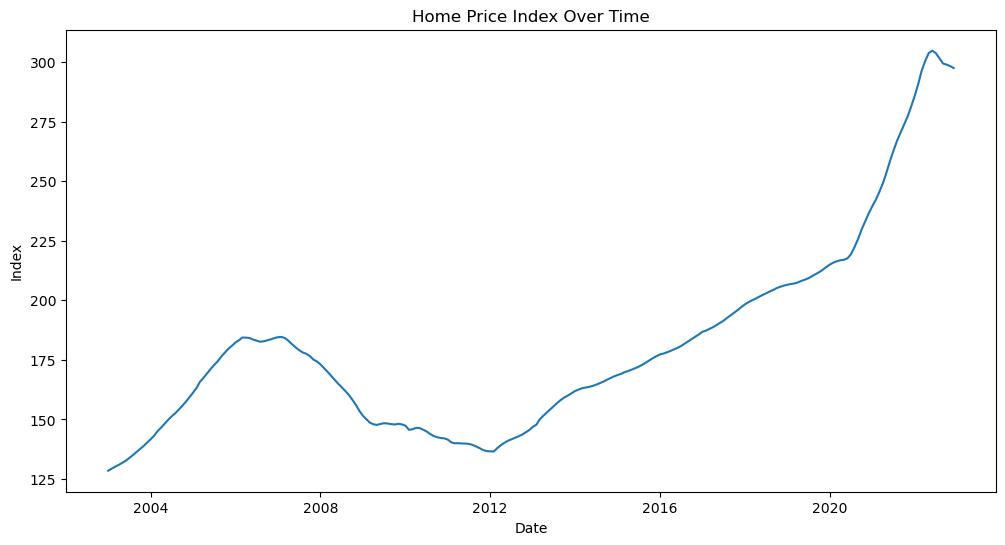

In [98]:
# Plot home price index (target var)
plt.figure(figsize=(12,6))
plt.plot(df.index, df["home_price_index"])
plt.title("Home Price Index Over Time")
plt.xlabel("Date")
plt.ylabel("Index")
plt.show()

- The Home Price Index rose steadily until ~2006,
- then dropped sharply from 2007–2012 (housing crash).
- After 2012 it recovered, with rapid growth after 2020, 
- followed by a small decline in 2022–2023.

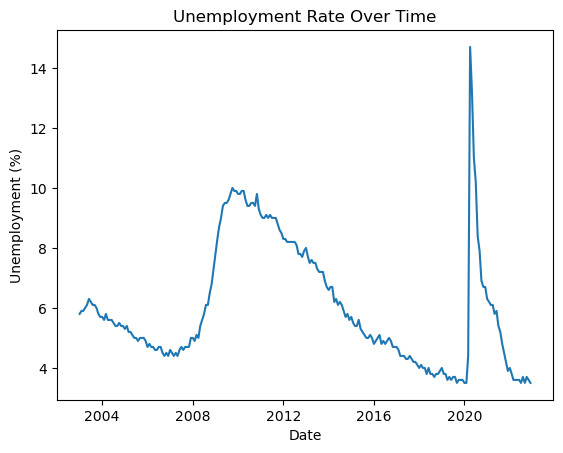

In [99]:
# Unemployment Rate
plt.plot(df.index, df['unemployment_rate'])
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment (%)')
plt.show()

- Spike in 2008 to 2010 during the financial crisis.
- Huge jump in 2020 (COVID 19).
- Now trending back to 3–4%.

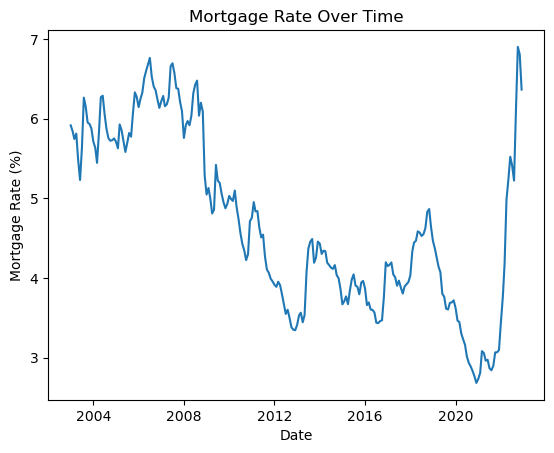

In [100]:
# Mortgage rate
plt.plot(df.index, df['mortgage_rate'])
plt.title('Mortgage Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Mortgage Rate (%)')
plt.show()

- Declines steadily after 2008.
- Stayed low through 2010s.
- Sharp increase again in 2022.

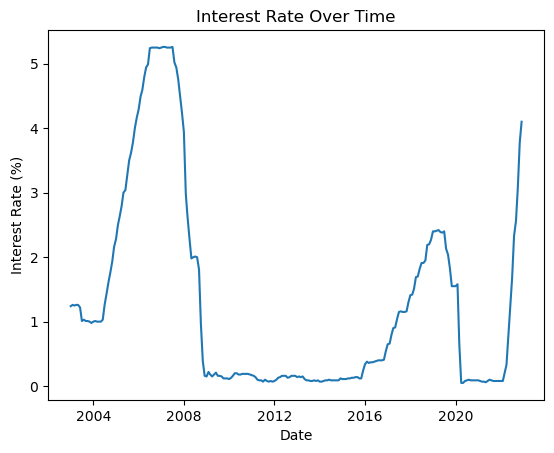

In [101]:
# Interest rate 
plt.plot(df.index, df['interest_rate'])
plt.title('Interest Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.show()

- High pre 2008, then dropped close to 0.
- Stayed near 0 for a decade.
- Big jump again from 2022 

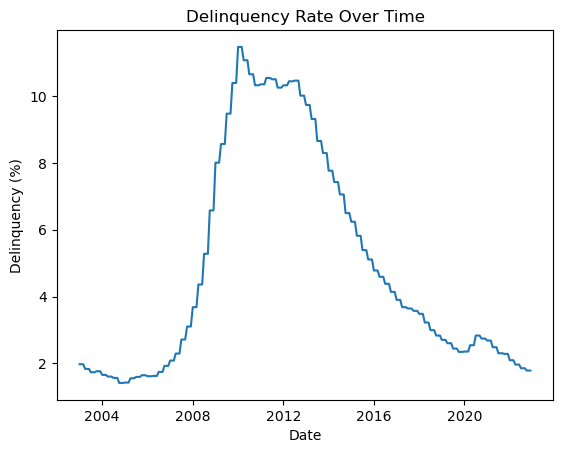

In [102]:
# Delinquency rate
plt.plot(df.index, df['delinquency_rate'])
plt.title('Delinquency Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Delinquency (%)')
plt.show()

- Rose steeply during 2008-2012 crisis.
- Fell steadily after 2013.
- Very low after 2020.

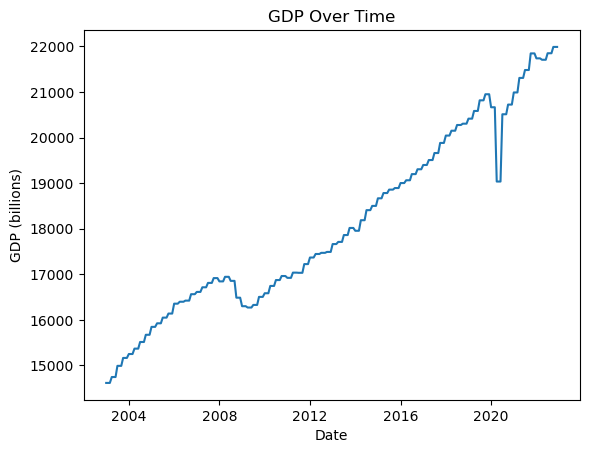

In [103]:
# GDP
plt.plot(df.index, df['GDP'])
plt.title('GDP Over Time')
plt.xlabel('Date')
plt.ylabel('GDP (billions)')
plt.show()

- GDP shows steady long-term growth, reflecting economic expansion.  
- Clear dip in 2008–2009.
- Sharp drop in 2020, then quick recovery.  
- Strong positive correlation with home prices.  

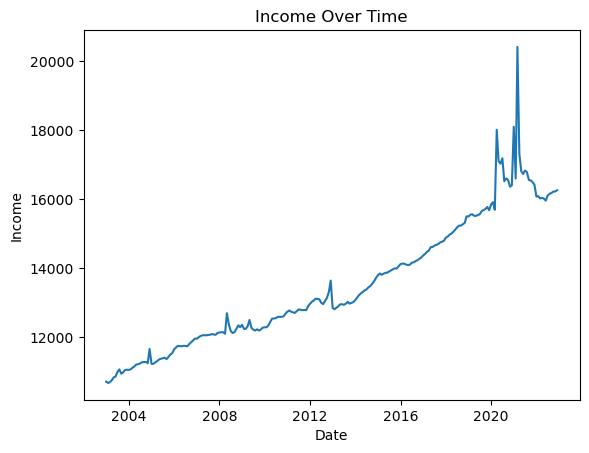

In [104]:
# Income
plt.plot(df.index, df['income'])
plt.title('Income Over Time')
plt.xlabel('Date')
plt.ylabel('Income')
plt.show()


- Income shows steady long-term growth, with some sharp spikes around 2020.  
- Strong positive correlation with home prices 
- Higher incomes support higher housing demand.  

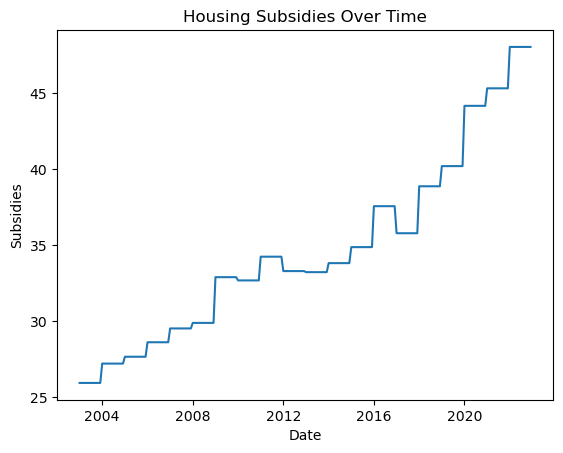

In [105]:
# Housing Subsidies
plt.plot(df.index, df['housing_subsidies'])
plt.title('Housing Subsidies Over Time')
plt.xlabel('Date')
plt.ylabel('Subsidies')
plt.show()


- Housing subsidies rise gradually over time with step increases.  
- Strong positive correlation with home prices (0.83).    

## Correlations

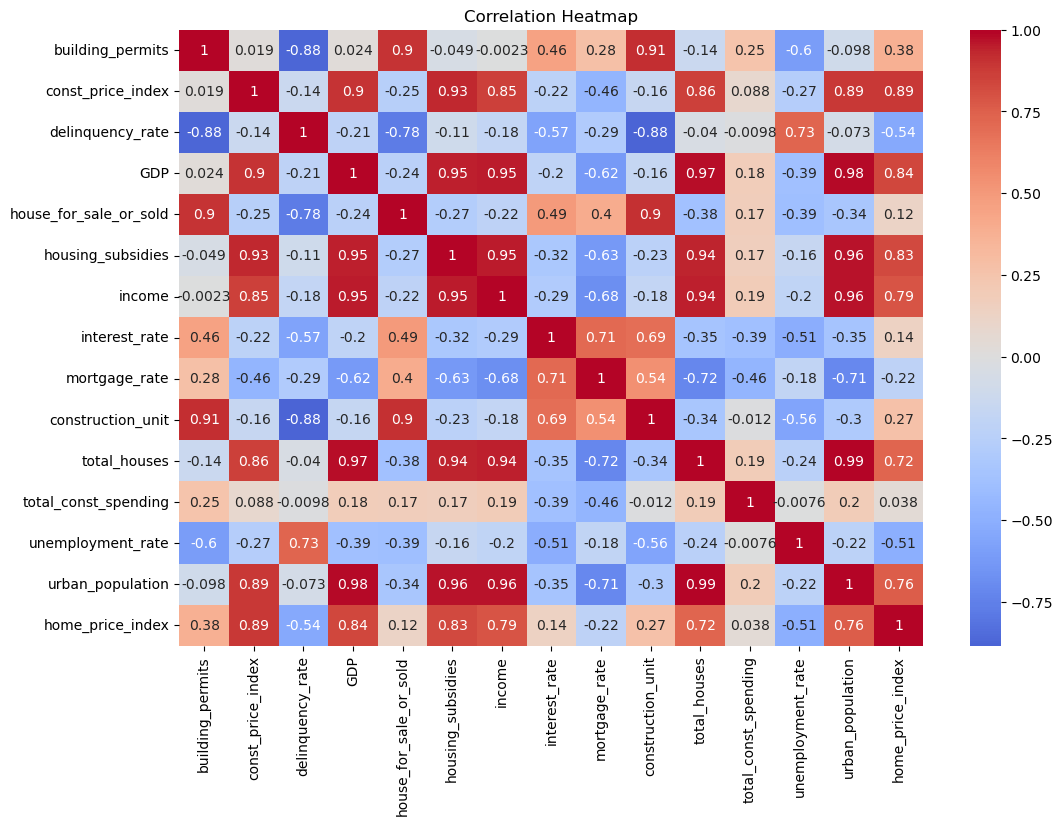

home_price_index          1.000000
const_price_index         0.888823
GDP                       0.837699
housing_subsidies         0.828885
income                    0.788287
urban_population          0.763985
total_houses              0.720495
building_permits          0.381115
construction_unit         0.268593
interest_rate             0.135246
house_for_sale_or_sold    0.122313
total_const_spending      0.037852
mortgage_rate            -0.218551
unemployment_rate        -0.505807
delinquency_rate         -0.535645
Name: home_price_index, dtype: float64

In [106]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

corr["home_price_index"].sort_values(ascending=False)

- Strong positive correlations: const_price_index, GDP, subsidies, income.
- Negative correlations: unemployment, delinquency, mortgage rate.
- total_const_spending = no correlation.

## Outliers

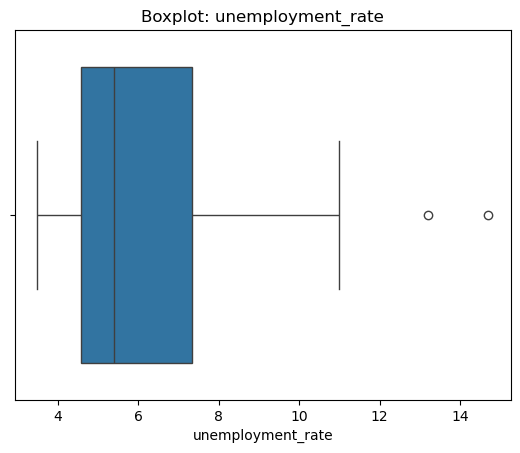

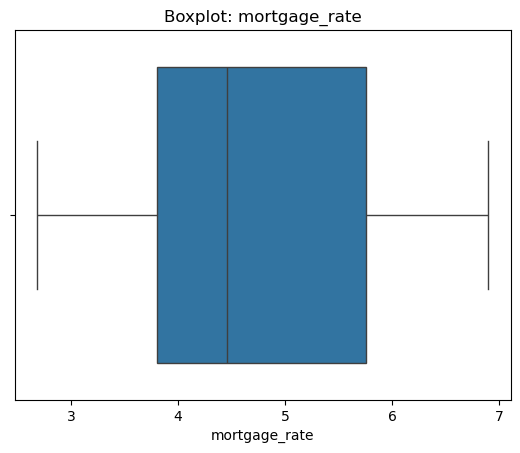

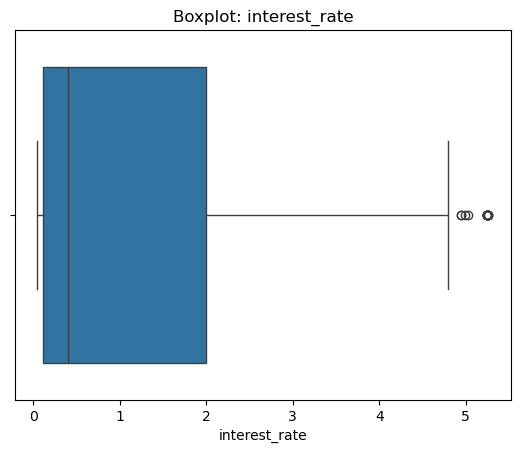

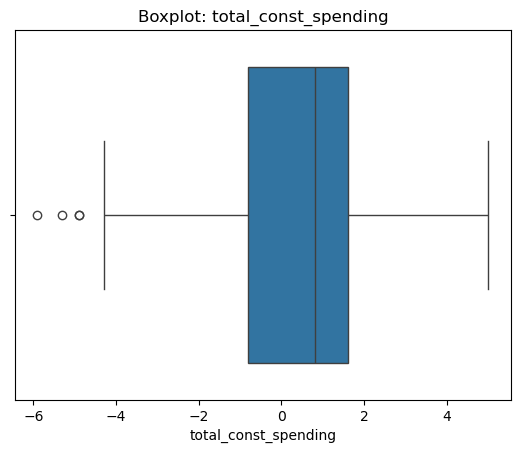

In [107]:
for col in ['unemployment_rate','mortgage_rate','interest_rate','total_const_spending']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.show()

- Unemployment rate: Outliers at 13–15%, during COVID
- Mortgage rate: No major extreme outliers, values within reasonable range.  
- Interest rate: Outliers >5% pre-2008   
- Total construction spending: Negative values appear 

## Target relationships

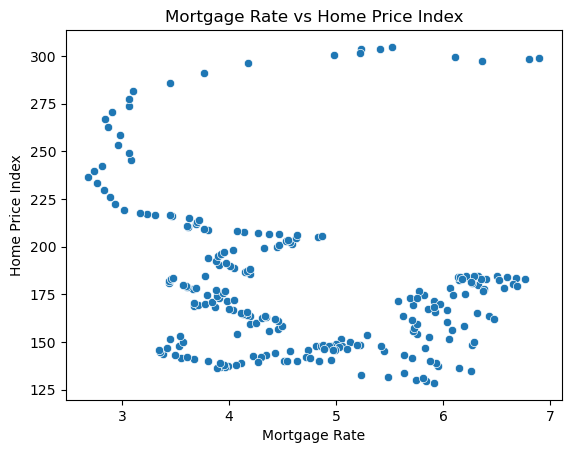

In [108]:
sns.scatterplot(x='mortgage_rate', y='home_price_index', data=df)
plt.title('Mortgage Rate vs Home Price Index')
plt.xlabel("Mortgage Rate")
plt.ylabel("Home Price Index")
plt.show()

- Weak negative relationship overall: higher mortgage rates tend to align with lower house prices.  
- Pattern is noisy, could be due to lagged effect.  

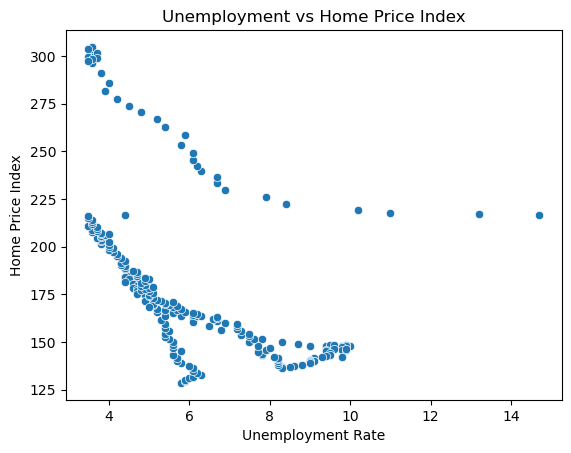

In [109]:
sns.scatterplot(x='unemployment_rate', y='home_price_index', data=df)
plt.title('Unemployment vs Home Price Index')
plt.xlabel("Unemployment Rate")
plt.ylabel("Home Price Index")
plt.show()

- Clear negative relationship: higher unemployment strongly linked with lower house prices.  
- Matches crisis periods. 
- Stronger correlation than mortgage rate (-0.50).

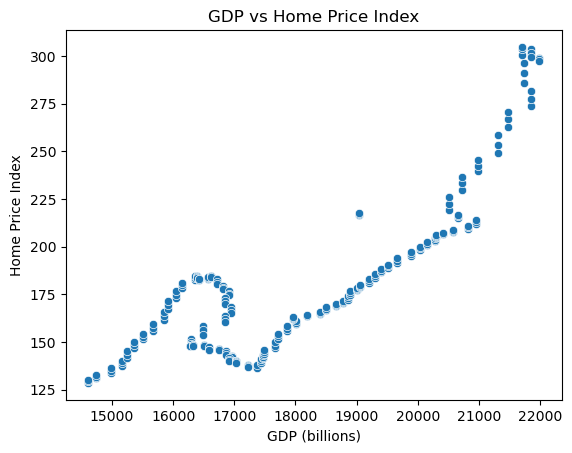

In [110]:
sns.scatterplot(x="GDP", y="home_price_index", data=df)
plt.title("GDP vs Home Price Index")
plt.xlabel("GDP (billions)")
plt.ylabel("Home Price Index")
plt.show()

- Clear strong positive relationship: as GDP rises, home prices also rise.  
- Matches correlation heatmap (0.84).  
- Confirms GDP is one of the strongest predictors of housing prices.  